In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the cvs files into dataframe

In [ ]:
df_movies=pd.read_csv("movies.csv")
df_ratings=pd.read_csv("ratings.csv")
df_my_ratings=pd.read_csv("ratings_saumya.csv")

## What does movies dataset look like?

In [ ]:
df_movies.shape

In [ ]:
unique_movies=df_movies['movieId'].unique().tolist()
len(unique_movies)

In [46]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## What does ratings dataset look like?

In [47]:
df_ratings.shape

(100836, 4)

In [49]:
df_my_ratings.shape

(150, 4)

In [50]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [51]:
df_ratings['rating'].min()

0.5

In [52]:
df_ratings['rating'].max()

5.0

## Merge movie and ratings dataframe

In [53]:
frame=[df_ratings,df_my_ratings]
rating_data = pd.concat(frame)
rating_data.shape

(100986, 4)

In [54]:
rating_data.tail()

,userId,movieId,rating,timestamp
145,0,117192,4.0,1260759144
146,0,69122,4.0,1260759144
147,0,69406,3.5,1260759144
148,0,69306,3.0,1260759144
149,0,69844,5.0,1260759144


In [55]:
movielens_dataset=df_movies.merge(rating_data,on='movieId',how='inner')
movielens_dataset.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [56]:
unique_users = movielens_dataset['userId'].unique().tolist()
len(unique_users)

611

## What are the genres?

In [57]:
#census of genre
genre_labels = set()
for s in movielens_dataset['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

In [58]:
keyword_count = dict()
for genre in genre_labels:
    keyword_count[genre]=0
for keyword in movielens_dataset['genres'].str.split('|'):
    for genre in keyword:
        if pd.notnull(genre):
            keyword_count[genre]+=1

In [59]:
del keyword_count['(no genres listed)']
keyword_count

{'Thriller': 26489,
 'Comedy': 39096,
 'Children': 9213,
 'Adventure': 24223,
 'IMAX': 4164,
 'Romance': 18139,
 'Musical': 4138,
 'Horror': 7293,
 'Drama': 41973,
 'Film-Noir': 870,
 'Sci-Fi': 17289,
 'Crime': 16714,
 'Mystery': 7686,
 'Animation': 6991,
 'Western': 1931,
 'War': 4862,
 'Documentary': 1222,
 'Action': 30719,
 'Fantasy': 11852}

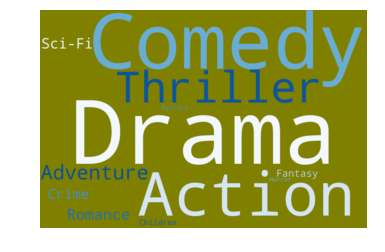

In [60]:
from PIL import Image
from wordcloud.wordcloud import WordCloud
#from wordcloud import WordCloud
wordcloud = WordCloud(width=3000,height=2000, max_words=2000,relative_scaling=1,
                      background_color='olive',colormap="Blues",min_font_size = 55,normalize_plurals=False)

wordcloud.generate_from_frequencies(keyword_count)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## What are the most rated movies?

In [ ]:
unique_movies=pd.DataFrame(df_movies['title'].unique())
unique_movies.columns=['title']
unique_movies.head(5)

In [ ]:
most_rated_movie=movielens_dataset.groupby('title').size().sort_values(ascending=False)
most_rated_movie.head(15)


In [ ]:
movie_avg_rating_dict = {}
count = 0
rating = 0
for i,v in movielens_dataset.iterrows():
    if v[1] in movie_avg_rating_dict:
        rating += v[4]
        count += 1
        movie_avg_rating_dict[v[1]]= rating/count
    else:
        count = 1
        rating = v[4]
        movie_avg_rating_dict[v[1]] = rating/count

In [ ]:
movie_avg_rating_dict

In [ ]:
df1=pd.DataFrame.from_dict(movie_avg_rating_dict,orient='index')
df1.columns=['averageRating']
df1.head()

In [ ]:
movie_total_rating_dict = {}
for i,v in movielens_dataset.iterrows():
    if v[1] in movie_total_rating_dict:
        movie_total_rating_dict[v[1]] = movie_total_rating_dict[v[1]]+1
    else:
        movie_total_rating_dict[v[1]] = 1

In [ ]:
movie_total_rating_dict

In [ ]:
df2=pd.DataFrame.from_dict(movie_total_rating_dict,orient='index')
df2.columns=['totalRating']
df2['totalRating'].max()

In [ ]:
df=pd.concat([df1, df2], axis=1)
df.head()

## Ratings vs Number of times movie was rated 

In [ ]:
plt.scatter(df.totalRating,df.averageRating)

## Which year has the most movies?

In [61]:
df_movies['year']=df_movies['title'].str.extract('.*\((.*)\).*')
df_movies.tail()

,movieId,title,genres,year
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017
9739,193585,Flint (2017),Drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,1991


In [62]:
year_analysis=df_movies.groupby('year').size()
year_analysis.tail()

year
2014    278
2015    274
2016    218
2017    147
2018     41
dtype: int64

In [63]:
year_df=pd.DataFrame(year_analysis).reset_index()
year_df.columns=['year','frequency']
year_df.shape

(107, 2)

In [65]:
year_df=year_df[year_df.frequency > 40].sort_values(by=['year'],ascending=True)
year_df.head()

,year,frequency
51,1964,43
52,1965,47
53,1966,42
54,1967,42
55,1968,42


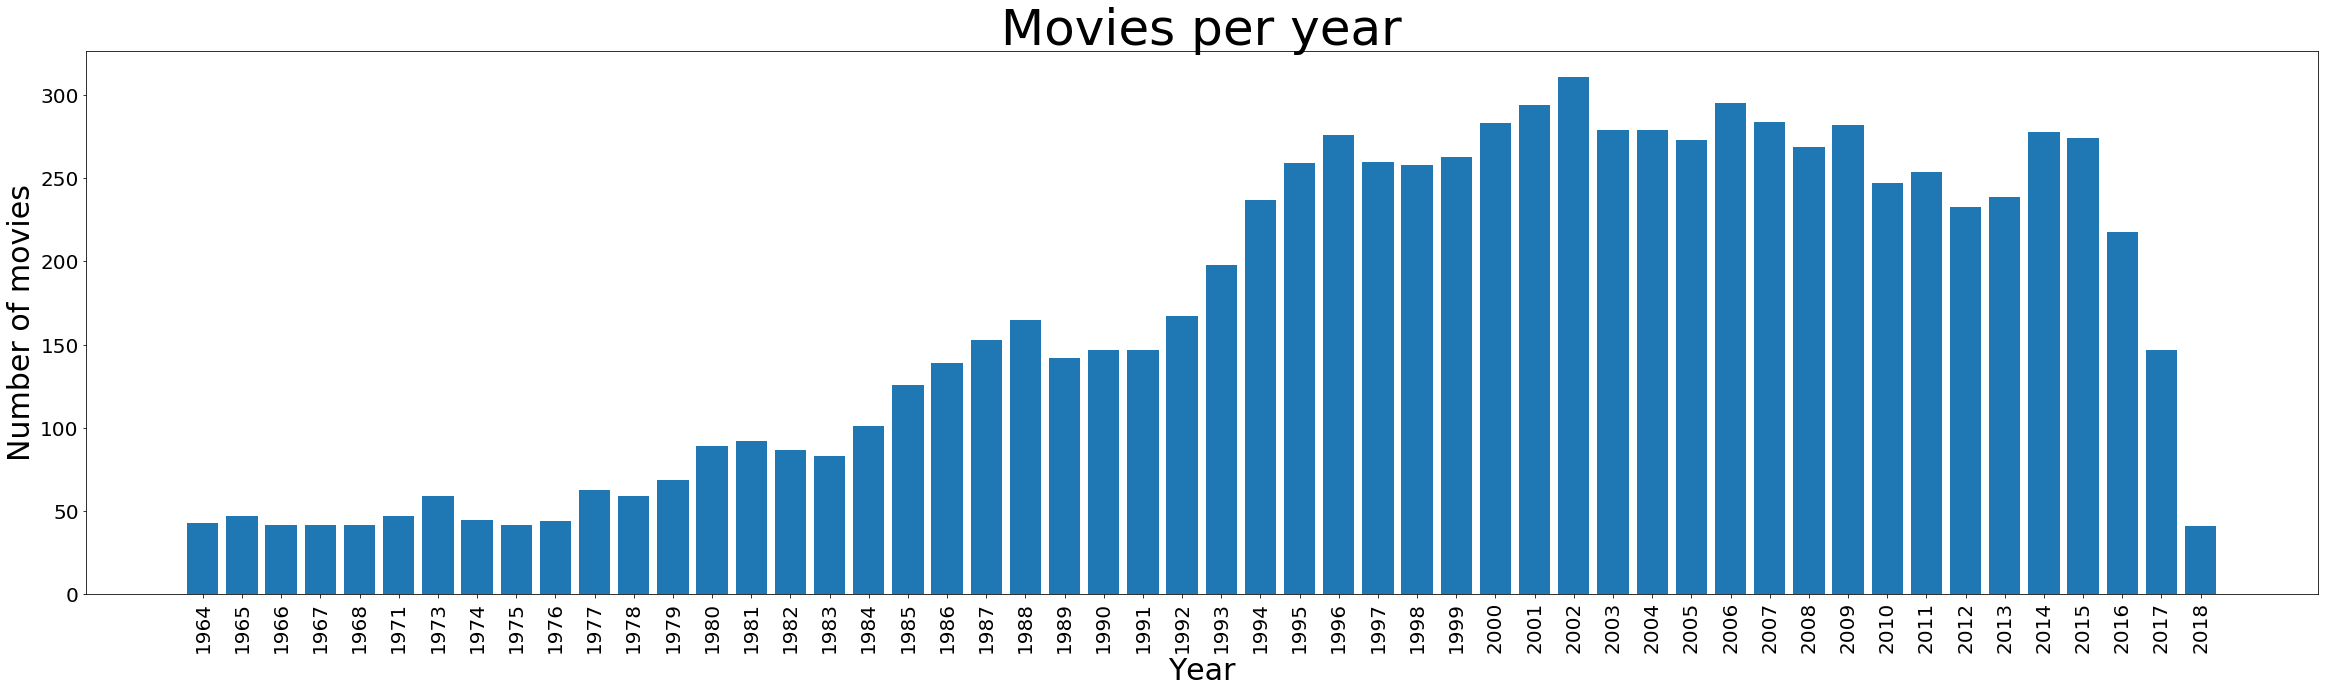

In [66]:
#plt.pyplot.bar(year_df['year'],year_df['frequency'],align='center')
x=year_df['year']
y=year_df['frequency']
plt.figure(figsize=(40,10))
plt.title('Movies per year',fontsize=50)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Year',fontsize=30)
plt.ylabel('Number of movies',fontsize=30)
plt.bar(x,y)
plt.show()

## Results of recommendation system

In [ ]:
df_result=pd.DataFrame({'Algorithms':['ContentBased','UserBased','ItemBased','SVD','SVD++','Hybrid','Random'],
                       'RMSE':[1.522,0.9722,0.9769,0.8752,0.8627,1.2578,1.4224]})
df_result.head(10)

In [ ]:
plt.bar(df_result['Algorithms'],df_result['RMSE'])
plt.xlabel('Algorithms',fontsize=25)
plt.ylabel('RMSE',fontsize=25)
plt.title('Comparing RMSE',fontsize=30)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.figure(figsize=(20,10))

In [ ]:
df_time=pd.DataFrame({'Algorithms':['ContentBased','UserBased','ItemBased','SVD','SVD++','Hybrid','Random'],
                      'Time':[1363.891,319.258,1454.978,68.948,2675.819,1088.37,11.973]})
df_time.head()
                

In [ ]:
plt.bar(df_time['Algorithms'],df_time['Time'])
plt.xlabel('Algorithms',fontsize=25)
plt.ylabel('Time',fontsize=25)
plt.title('Comparing run time',fontsize=30)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.figure(figsize=(20,10))